# **Project Title: Data Visualization**

# **objective**

**Transform raw retail sales data into meaningful visuals to derive insights and support business decisions.**



# Load the Data

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

df = pd.read_csv('/content/retail_sales_dataset.csv')
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


# Data Exploration

In [4]:
df.info()
print(df.isnull().sum())
df.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB
Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
count,1000.000000,1000,1000,1000,1000.00000,1000,1000.000000,1000.000000,1000.000000
unique,NaN,345,1000,2,NaN,3,NaN,NaN,NaN
top,NaN,2023-05-16,CUST1000,Female,NaN,Clothing,NaN,NaN,NaN
freq,NaN,11,1,510,NaN,351,NaN,NaN,NaN
mean,500.500000,NaN,NaN,NaN,41.39200,NaN,2.514000,179.890000,456.000000
std,288.819436,NaN,NaN,NaN,13.68143,NaN,1.132734,189.681356,559.997632
min,1.000000,NaN,NaN,NaN,18.00000,NaN,1.000000,25.000000,25.000000
25%,250.750000,NaN,NaN,NaN,29.00000,NaN,1.000000,30.000000,60.000000
50%,500.500000,NaN,NaN,NaN,42.00000,NaN,3.000000,50.000000,135.000000
75%,750.250000,NaN,NaN,NaN,53.00000,NaN,4.000000,300.000000,900.000000


Data Cleaning

In [5]:
# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Create new columns
df['YearMonth'] = df['Date'].dt.to_period('M')
df['Revenue'] = df['Quantity'] * df['Price per Unit']

# Clean check
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,YearMonth,Revenue
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,2023-11,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,2023-02,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,2023-01,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,2023-05,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,2023-05,100


# **Visualisation section**

# 1.Monthly revenue trend

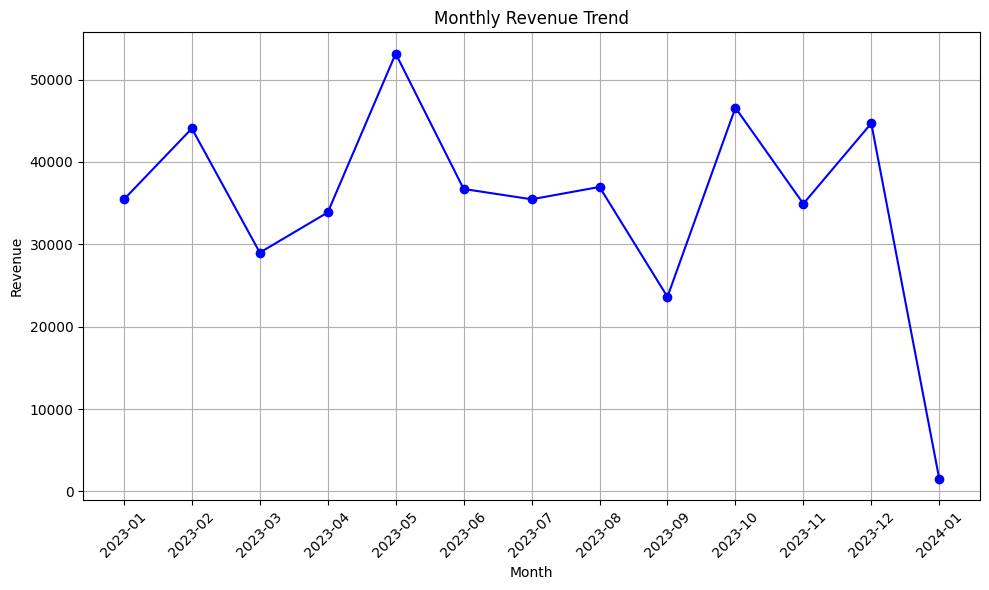

In [6]:
monthly_revenue = df.groupby('YearMonth')['Revenue'].sum().reset_index()

plt.figure(figsize=(10,6))
plt.plot(monthly_revenue['YearMonth'].astype(str), monthly_revenue['Revenue'], marker='o', color='blue')
plt.title('Monthly Revenue Trend')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

## 2.Revenue by product

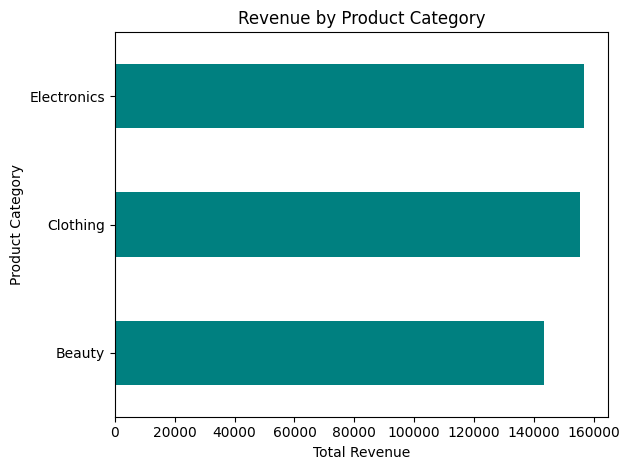

In [7]:
category_revenue = df.groupby('Product Category')['Revenue'].sum().sort_values(ascending=True)

category_revenue.plot(kind='barh', color='teal')
plt.title("Revenue by Product Category")
plt.xlabel("Total Revenue")
plt.tight_layout()
plt.show()


# 3.Customer gender distribution

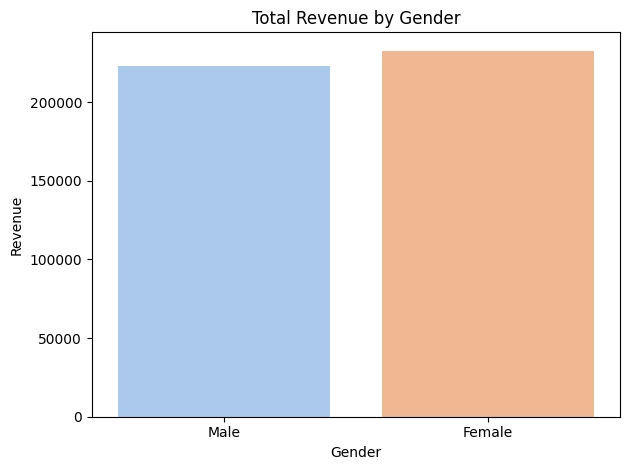

In [8]:
sns.barplot(data=df, x='Gender', y='Revenue', estimator=sum, errorbar=None, palette='pastel', hue='Gender', legend=False)
plt.title("Total Revenue by Gender")
plt.tight_layout()
plt.show()

# 5.Age Distribution of customers

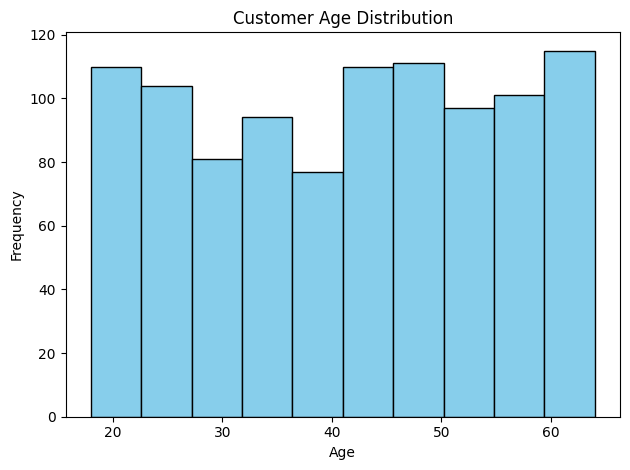

In [9]:
plt.hist(df['Age'], bins=10, color='skyblue', edgecolor='black')
plt.title("Customer Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


**6.Heatmap: Revenue by Day and Hour**

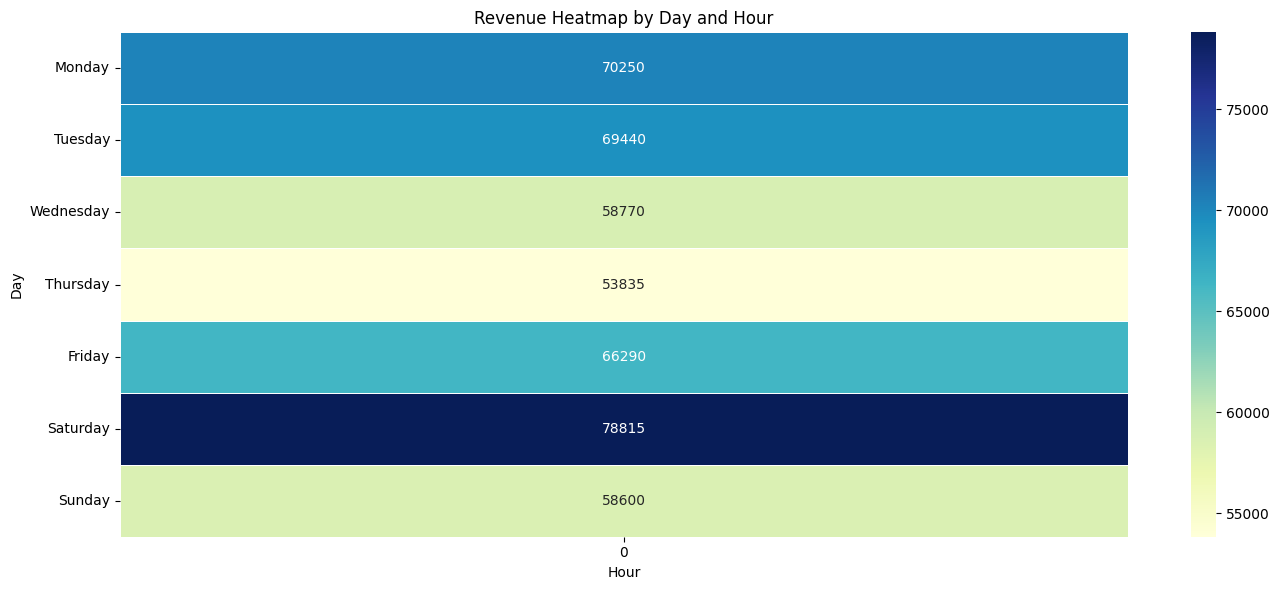

In [10]:
df['Hour'] = df['Date'].dt.hour
df['Day'] = df['Date'].dt.day_name()

pivot_table = df.pivot_table(index='Day', columns='Hour', values='Revenue', aggfunc='sum')
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
pivot_table = pivot_table.reindex(day_order)

plt.figure(figsize=(14,6))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt=".0f", linewidths=.5)
plt.title("Revenue Heatmap by Day and Hour")
plt.tight_layout()
plt.show()

# **Data Story and Insights**

-Revenue peaked in May and October, indicating seasonal shopping behavior.
-Electronics generates the highest revenue.
-The majority of purchases are made by females, especially aged 30-50.
-Peak shopping times are midday hours during weekdays.`
-Business should focus on fashion inventory during festive periods and marketing to women in their 30s and 40s.

# **cleaned dataset**

In [11]:
df.to_csv("cleaned_retail_data.csv", index=False)

This cleaned datset can be used to create dashboards using tableau or power bi.
